In [2]:
from __future__ import print_function
import pandas as pd
import shutil
import os
import sys

labels = pd.read_csv(r'D:\HAR\Human Action Recognition\Training_set.csv')

train_dir =r'D:\HAR\Human Action Recognition\train'
HAR_= r"D:\HAR\Human Action Recognition\HAR_"
if not os.path.exists(HAR_):
    os.mkdir(HAR_)

for filename, class_name in labels.values:
    # Create subdirectory with `class_name`
    if not os.path.exists(HAR_ + str(class_name)):
        os.mkdir(HAR_ + str(class_name))
    src_path = train_dir + '/'+ filename 
    dst_path = HAR_ + str(class_name) + '/' + filename 
    try:
        shutil.copy(src_path, dst_path)
        print("sucessful")
    except IOError as e:
        print('Unable to copy file {} to {}'
              .format(src_path, dst_path))
    except:
        print('When try copy file {} to {}, unexpected error: {}'
              .format(src_path, dst_path, sys.exc_info()))

sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful


Class Counts:
sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: label, dtype: int64


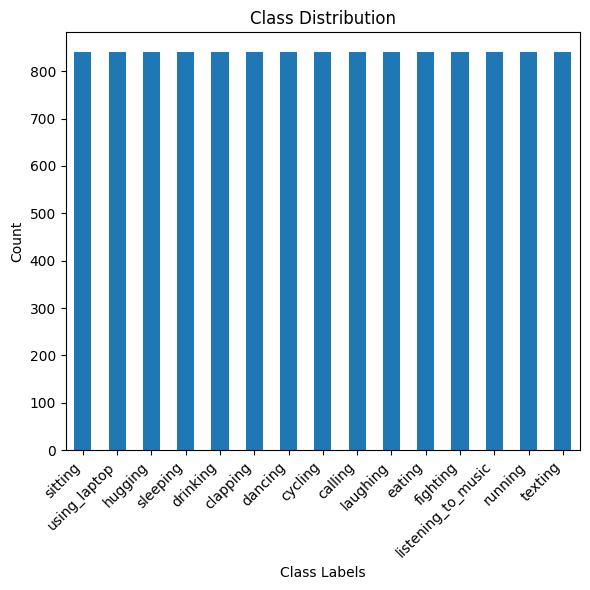

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset_path = 'D:\HAR\Human Action Recognition\HAR_'
labels_file = 'D:\HAR\Human Action Recognition\Training_set.csv'

# Function to load and preprocess an image
def load_image(image_path):
    image = cv2.imread(image_path)
    return image
def main():
    labels = pd.read_csv(labels_file)
    class_counts = labels['label'].value_counts()
    print("Class Counts:")
    print(class_counts)
    plt.figure(figsize=(6, 6))
    class_counts.plot(kind='bar')
    plt.xlabel('Class Labels')
    plt.ylabel('Count')
    plt.title('Class Distribution')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


In [3]:
import random

def split_images(source_folder, validation_folder, split_ratio=0.2):
    if not os.path.exists(validation_folder):
        os.makedirs(validation_folder)
    image_files = [file for file in os.listdir(source_folder) if file.lower().endswith(('.jpg'))]
    num_images_to_move = int(len(image_files) * split_ratio)
    images_to_move = random.sample(image_files, num_images_to_move)

    for image in images_to_move:
        source_path = os.path.join(source_folder, image)
        destination_path = os.path.join(validation_folder, image)
        i = 1
        while os.path.exists(destination_path):
            base_name, extension = os.path.splitext(image)
            new_image_name = f"{base_name}_{i}{extension}"
            destination_path = os.path.join(validation_folder, new_image_name)
            i += 1

        shutil.move(source_path, destination_path)

if __name__ == "__main__":
    source_folders =  ["D:\HAR\Human Action Recognition\HAR_\HAR_calling",
                       "D:\HAR\Human Action Recognition\HAR_\HAR_clapping",
                       "D:\HAR\Human Action Recognition\HAR_\HAR_cycling",
                        "D:\HAR\Human Action Recognition\HAR_\HAR_dancing",
                       "D:\HAR\Human Action Recognition\HAR_\HAR_drinking",
                       "D:\HAR\Human Action Recognition\HAR_\HAR_eating",
                       "D:\HAR\Human Action Recognition\HAR_\HAR_fighting",
                       "D:\HAR\Human Action Recognition\HAR_\HAR_hugging",
                       "D:\HAR\Human Action Recognition\HAR_\HAR_laughing",
                       "D:\HAR\Human Action Recognition\HAR_\HAR_listening_to_music",
                       "D:\HAR\Human Action Recognition\HAR_\HAR_running",
                       "D:\HAR\Human Action Recognition\HAR_\HAR_sitting",
                       "D:\HAR\Human Action Recognition\HAR_\HAR_sleeping",
                       "D:\HAR\Human Action Recognition\HAR_\HAR_texting",
                       "D:\HAR\Human Action Recognition\HAR_\HAR_using_laptop"]
    validation_folders = [
        "D:\HAR\Human Action Recognition\Validation\HAR_calling",
        "D:\HAR\Human Action Recognition\Validation\HAR_clapping",
        "D:\HAR\Human Action Recognition\Validation\HAR_cycling",
        "D:\HAR\Human Action Recognition\Validation\HAR_dancing",
        "D:\HAR\Human Action Recognition\Validation\HAR_drinking",
        "D:\HAR\Human Action Recognition\Validation\HAR_eating",
        "D:\HAR\Human Action Recognition\Validation\HAR_fighting",
        "D:\HAR\Human Action Recognition\Validation\HAR_hugging",
        "D:\HAR\Human Action Recognition\Validation\HAR_laughing",
        "D:\HAR\Human Action Recognition\Validation\HAR_listening_to_music",
        "D:\HAR\Human Action Recognition\Validation\HAR_running",
        "D:\HAR\Human Action Recognition\Validation\HAR_sitting",
        "D:\HAR\Human Action Recognition\Validation\HAR_sleeping",
        "D:\HAR\Human Action Recognition\Validation\HAR_texting",
        "D:\HAR\Human Action Recognition\Validation\HAR_using_laptop"]

    for source_folder, validation_folder in zip(source_folders, validation_folders):
        split_images(source_folder, validation_folder)


In [2]:

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np

import matplotlib.pyplot as plt
from glob import glob

from keras.preprocessing.image import ImageDataGenerator


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
IMAGE_SIZE = [224, 224]
train_path = '/kaggle/input/har-celebal-project/HAR/Human Action Recognition/HAR_'
valid_path = '/kaggle/input/har-celebal-project/HAR/Human Action Recognition/Validation'

In [4]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 3s 0us/step


In [5]:

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

In [6]:
 # useful for getting number of classes
folders = glob('HAR/Human Action Recognition/HAR_/*')

In [24]:
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

vgg_output = vgg.output

x = Flatten()(vgg_output)

x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)

prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

for layer in vgg.layers[:-4]:
    layer.trainable = False

optimizer = Adam(learning_rate=0.0001)

print(model.summary())


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [25]:
# view the structure of the model
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [26]:

model.compile(optimizer=optimizer,
                loss='categorical_crossentropy', 
                metrics=['accuracy']
            )



In [19]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [27]:

training_set = train_datagen.flow_from_directory('HAR/Human Action Recognition/HAR_',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('HAR/Human Action Recognition/Validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 10080 images belonging to 15 classes.
Found 2520 images belonging to 15 classes.


In [28]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
315/315 [==============================] - 154s 483ms/step - loss: 2.5713 - accuracy: 0.2393 - val_loss: 1.8141 - val_accuracy: 0.4361
Epoch 2/50
315/315 [==============================] - 153s 484ms/step - loss: 2.0639 - accuracy: 0.3558 - val_loss: 1.6831 - val_accuracy: 0.4766
Epoch 3/50
315/315 [==============================] - 153s 487ms/step - loss: 1.8987 - accuracy: 0.4059 - val_loss: 1.6045 - val_accuracy: 0.4988
Epoch 4/50
315/315 [==============================] - 153s 485ms/step - loss: 1.7586 - accuracy: 0.4419 - val_loss: 1.5685 - val_accuracy: 0.5075
Epoch 5/50
315/315 [==============================] - 153s 485ms/step - loss: 1.6419 - accuracy: 0.4737 - val_loss: 1.5494 - val_accuracy: 0.5067
Epoch 6/50
315/315 [==============================] - 156s 494ms/step - loss: 1.5840 - accuracy: 0.4935 - val_loss: 1.4876 - val_accuracy: 0.5425
Epoch 7/50
315/315 [==============================] - 153s 486ms/step - loss: 1.4927 - accuracy: 0.5221 - val_loss: 1.4690 -

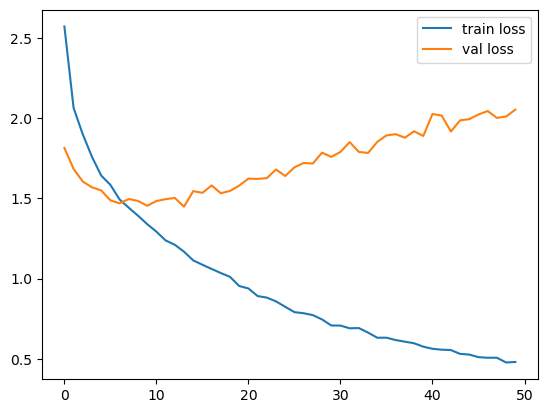

<Figure size 640x480 with 0 Axes>

In [38]:

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

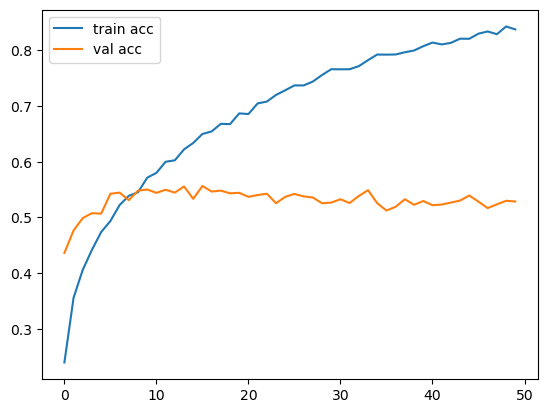

<Figure size 640x480 with 0 Axes>

In [39]:

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [40]:
from keras.models import load_model

model.save('HAR_model.h5')